This notebook will demonstrate that how we can use image prior contained in the structure of the network and train the network on that single image to get closest to the original image.

In [1]:
# When running in google colab uncomment following lines.

# !git clone https://github.com/Divyansh9125/EE-769-Course-Project---Deep-Image-Prior
# !mv EE-769-Course-Project---Deep-Image-Prior/* ./

Cloning into 'EE-769-Course-Project---Deep-Image-Prior'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 51 (delta 11), reused 27 (delta 3), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [2]:
from __future__ import print_function
%matplotlib inline 

import os
import numpy as np
from models import *

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import torch.optim

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

from skimage.measure import compare_psnr
from denoising_utility import *

In [3]:
imsize =-1
PLOT = True
sigma = 50
sigma_ = sigma/255.

In [4]:
img_path = 'data/original.png'

## Loading Image

Original Image: 


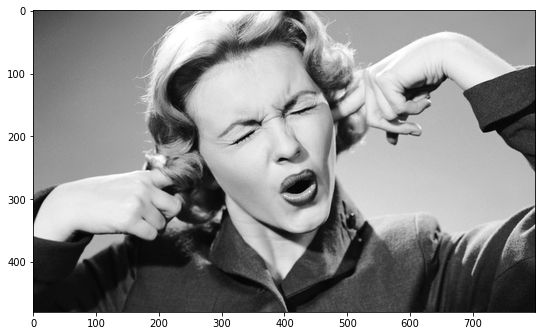


Noised Image: 


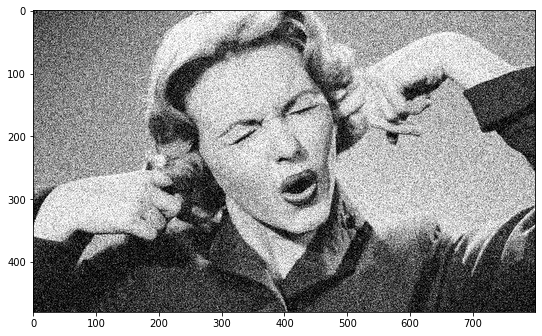

In [5]:
img_pil = crop_image(get_image(img_path, imsize)[0], d=16)
img_np = pil_to_np(img_pil) # converting PIL image to np array
img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma_) #adding noise to the original image
if PLOT:
  print('Original Image: ')
  plot_image_grid([img_np], 1, 8);
  print('\nNoised Image: ')
  plot_image_grid([img_noisy_np], 1, 8);

## Training

In [10]:
INPUT = 'noise' # 'meshgrid'
pad = 'reflection'
OPT_OVER = 'net' # 'net,input'

reg_noise_std = 1./20. # set to 1./20. for sigma=50
LR = 0.01

OPTIMIZER='adam' # 'LBFGS'
show_every = 100
exp_weight=0.99

num_iter = 2500
input_depth = 1
figsize = 8

# creates a convolutional network with skip connections
net = get_net(input_depth, 'skip', pad, n_channels=1,
              skip_n33d=128, skip_n33u=128, skip_n11=4, 
              num_scales=5, upsample_mode='bilinear').type(dtype)


# get initial noised image (random) from which the network will try and build up output image
# denoted as z in the paper
net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0])).type(dtype).detach()

# Compute number of parameters
s  = sum([np.prod(list(p.size())) for p in net.parameters()]); 

print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_noisy_torch = np_to_torch(img_noisy_np).type(dtype) # converting np array to torch tensor

Number of params: 2181737


Starting optimization with ADAM


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_r



After 0 iterations: 
Iteration 00000    Loss 0.110095   PSNR_noisy: 9.582321   PSRN_gt: 10.353478   PSNR_gt_sm: 10.353478 


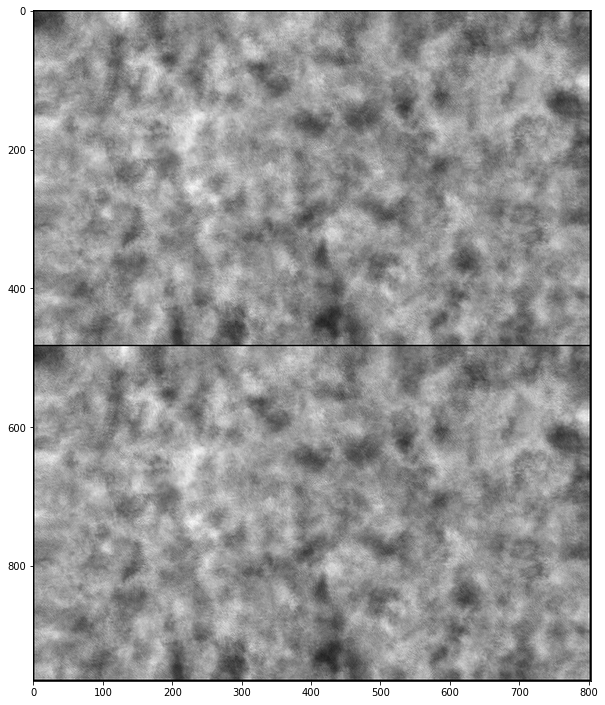



After 100 iterations: 
Iteration 00100    Loss 0.052667   PSNR_noisy: 12.784642   PSRN_gt: 15.600900   PSNR_gt_sm: 13.638271 


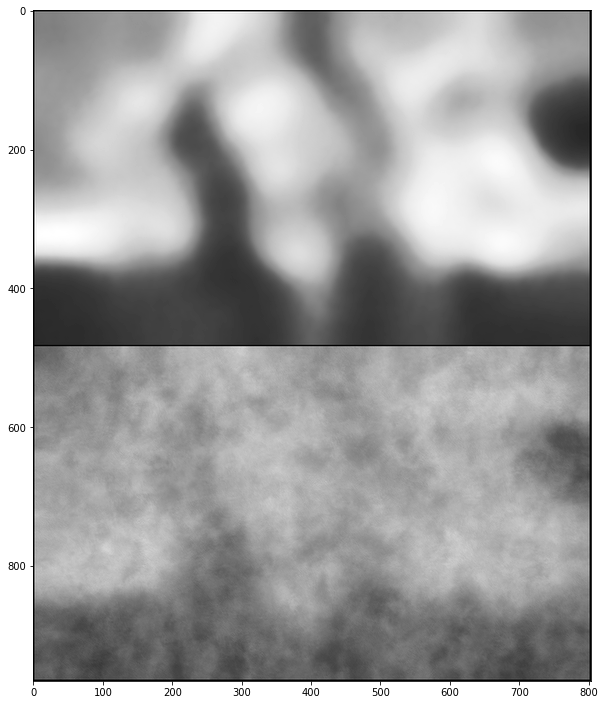



After 200 iterations: 
Iteration 00200    Loss 0.044743   PSNR_noisy: 13.492787   PSRN_gt: 17.449833   PSNR_gt_sm: 16.364217 


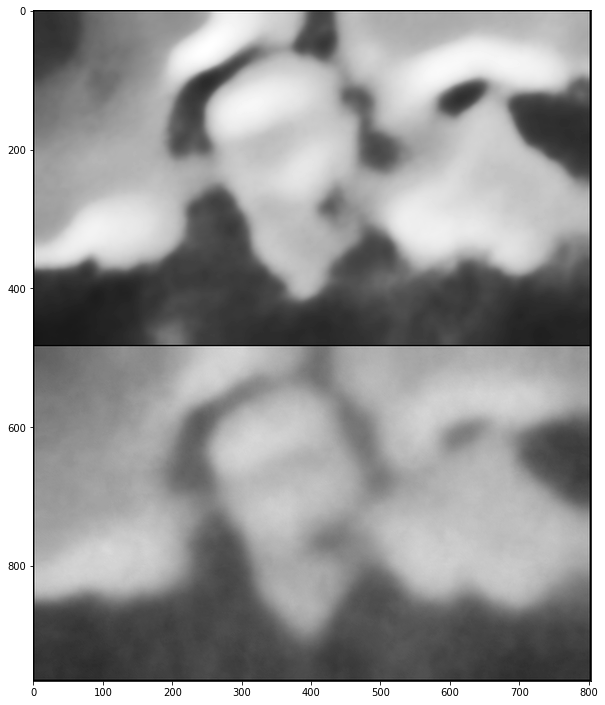



After 300 iterations: 
Iteration 00300    Loss 0.040332   PSNR_noisy: 13.943525   PSRN_gt: 18.845995   PSNR_gt_sm: 18.292845 


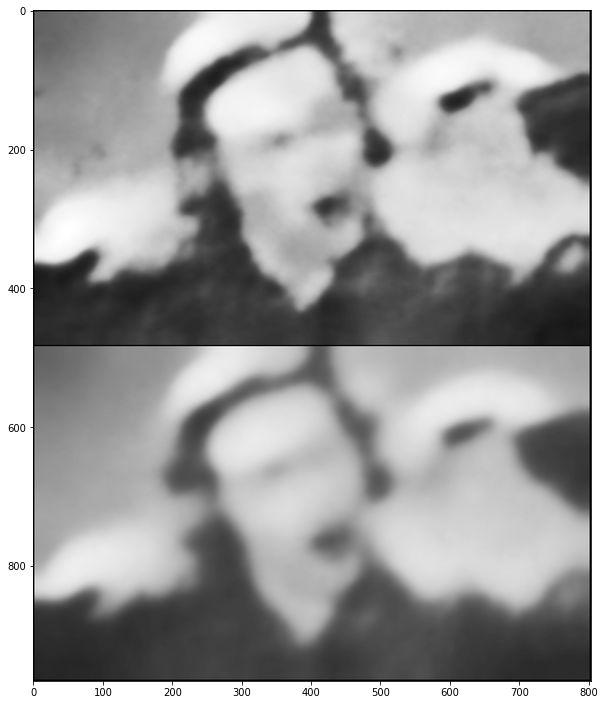



After 400 iterations: 
Iteration 00400    Loss 0.037651   PSNR_noisy: 14.242210   PSRN_gt: 20.100425   PSNR_gt_sm: 19.746248 


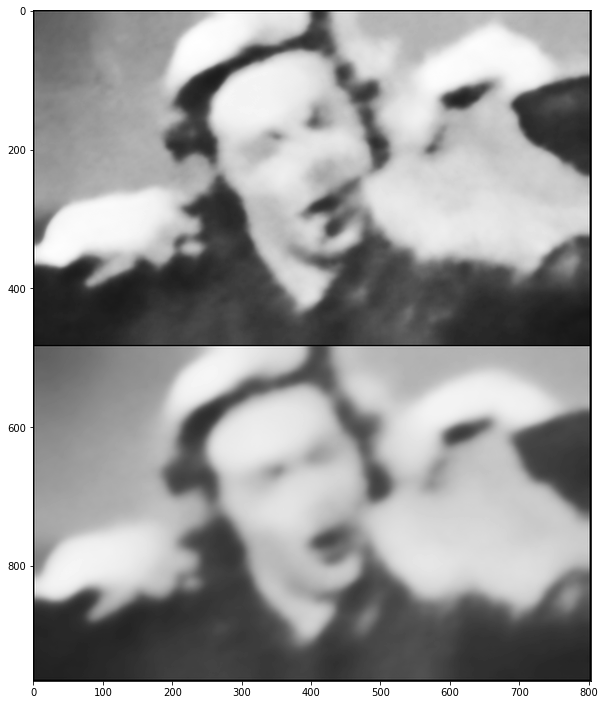



After 500 iterations: 
Iteration 00500    Loss 0.036274   PSNR_noisy: 14.404031   PSRN_gt: 20.826580   PSNR_gt_sm: 20.909614 


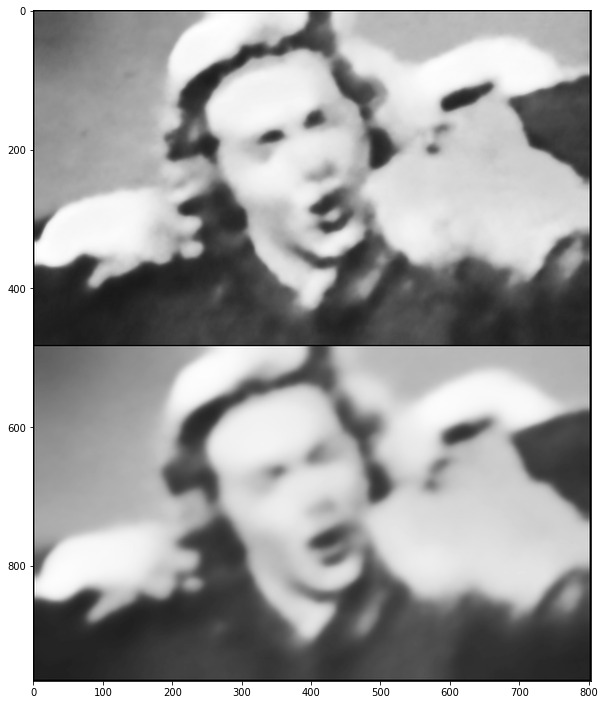



After 600 iterations: 
Iteration 00600    Loss 0.035119   PSNR_noisy: 14.544547   PSRN_gt: 21.563374   PSNR_gt_sm: 21.819211 


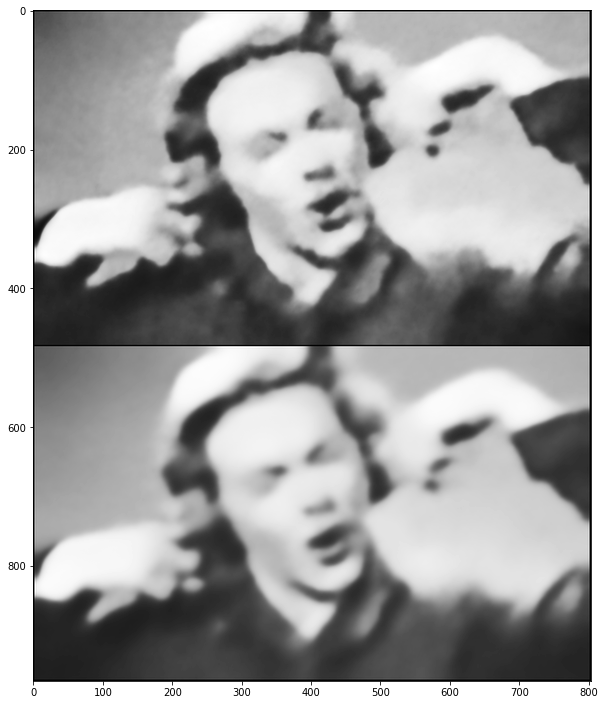



After 700 iterations: 
Iteration 00700    Loss 0.034107   PSNR_noisy: 14.671522   PSRN_gt: 22.326641   PSNR_gt_sm: 22.553931 


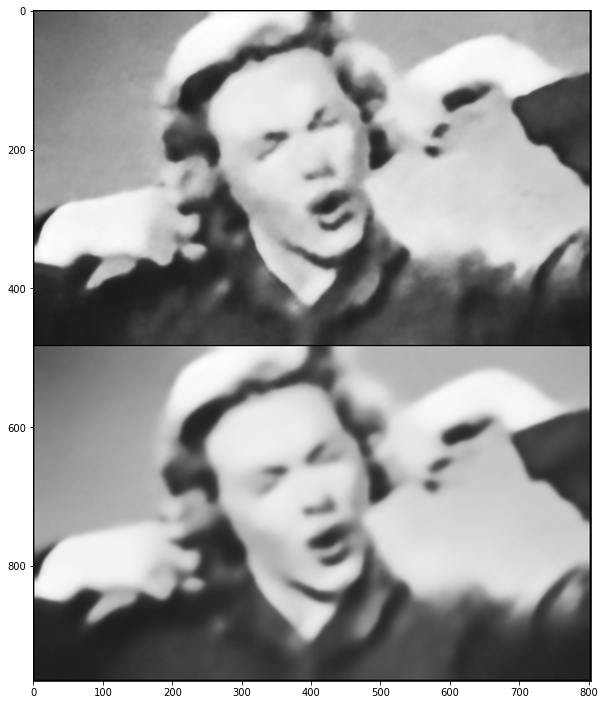



After 800 iterations: 
Iteration 00800    Loss 0.033828   PSNR_noisy: 14.707266   PSRN_gt: 22.575400   PSNR_gt_sm: 23.240929 


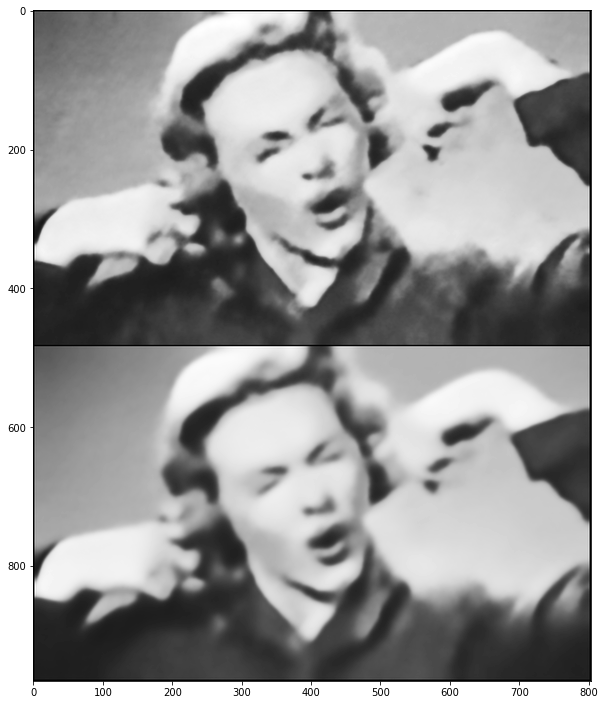



After 900 iterations: 
Iteration 00900    Loss 0.032903   PSNR_noisy: 14.827654   PSRN_gt: 23.410860   PSNR_gt_sm: 23.866922 


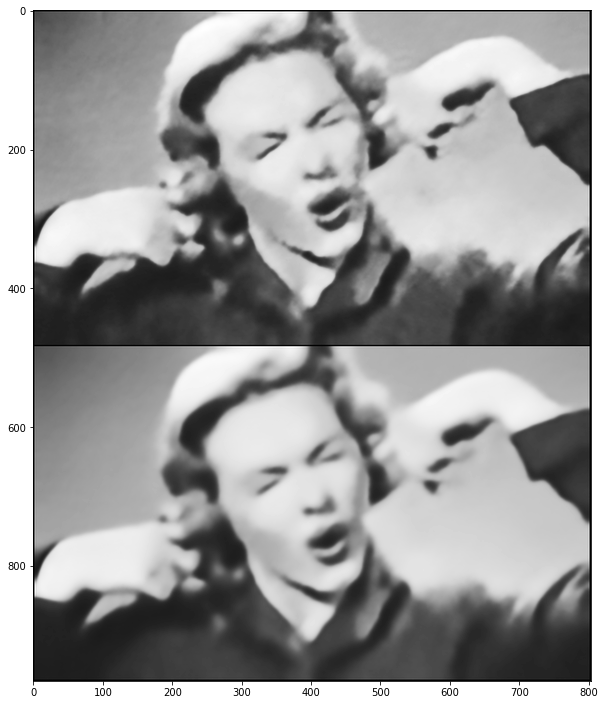



After 1000 iterations: 
Iteration 01000    Loss 0.032716   PSNR_noisy: 14.852390   PSRN_gt: 23.747206   PSNR_gt_sm: 24.448375 


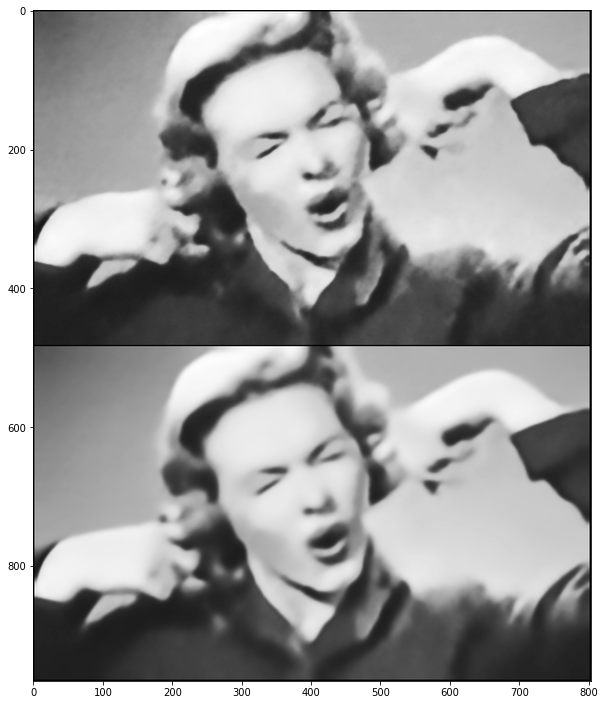



After 1100 iterations: 
Iteration 01100    Loss 0.032621   PSNR_noisy: 14.865078   PSRN_gt: 23.734446   PSNR_gt_sm: 24.506687 


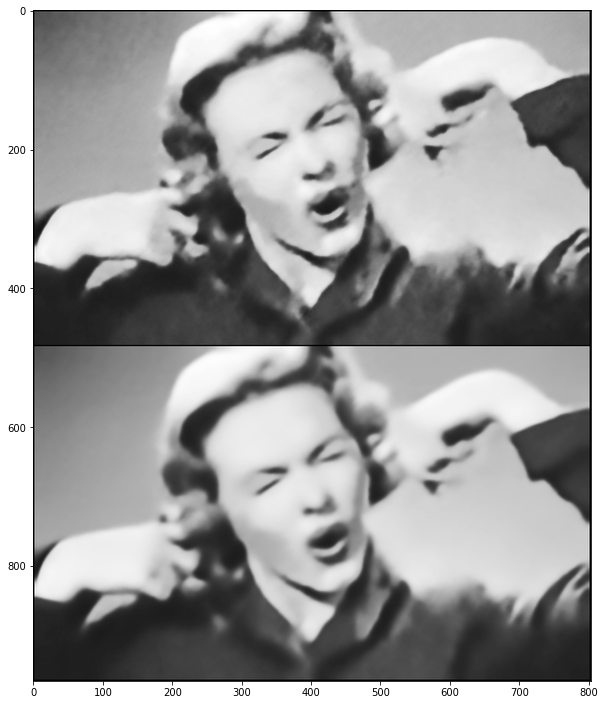



After 1200 iterations: 
Iteration 01200    Loss 0.032151   PSNR_noisy: 14.928011   PSRN_gt: 24.458697   PSNR_gt_sm: 25.074299 


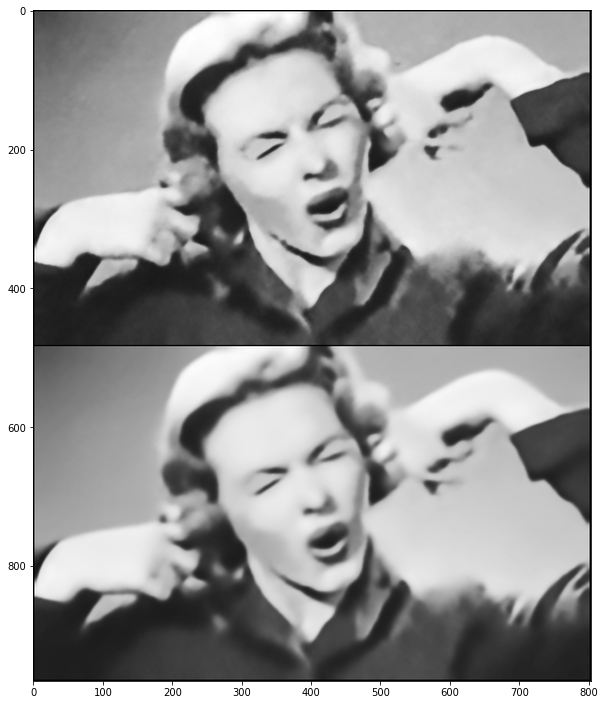



After 1300 iterations: 
Iteration 01300    Loss 0.031661   PSNR_noisy: 14.994785   PSRN_gt: 25.006170   PSNR_gt_sm: 25.696851 


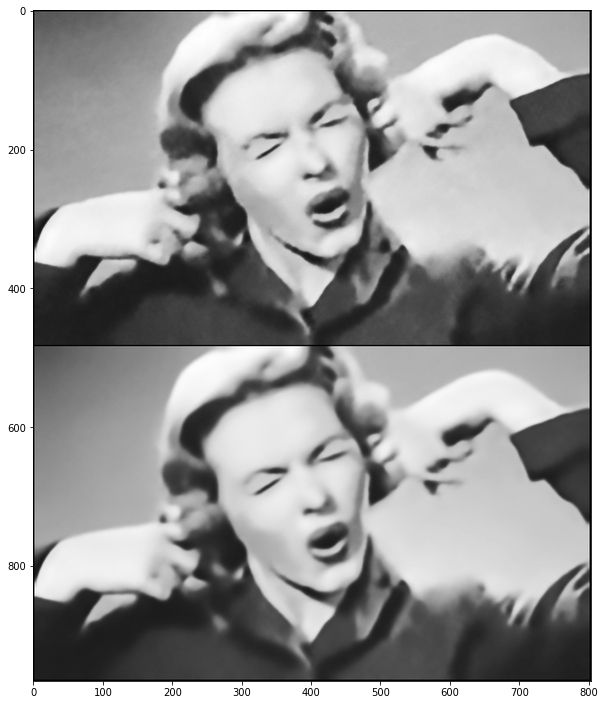



After 1400 iterations: 
Iteration 01400    Loss 0.031457   PSNR_noisy: 15.022767   PSRN_gt: 25.259654   PSNR_gt_sm: 26.204377 


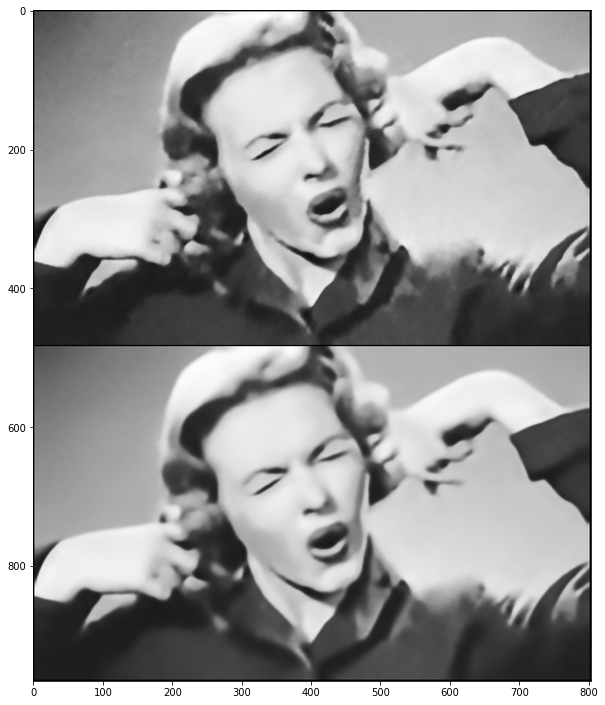



After 1500 iterations: 
Iteration 01500    Loss 0.031046   PSNR_noisy: 15.079964   PSRN_gt: 25.940503   PSNR_gt_sm: 26.642992 


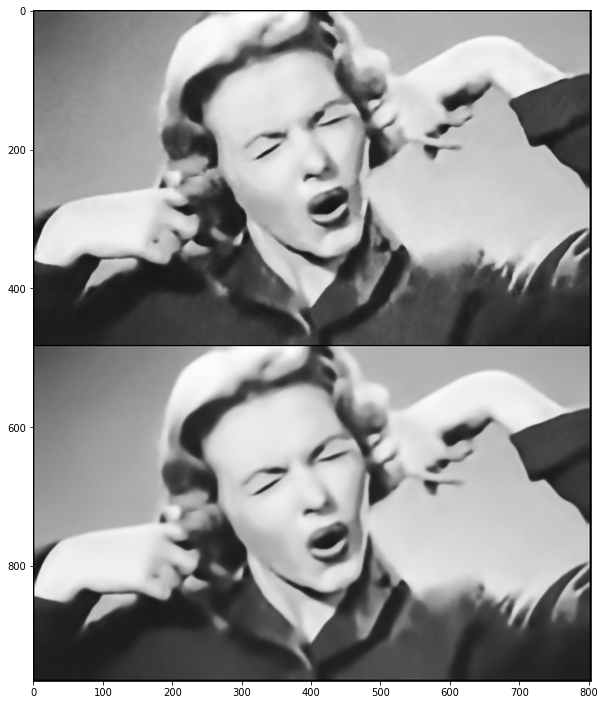



After 1600 iterations: 
Iteration 01600    Loss 0.030791   PSNR_noisy: 15.115803   PSRN_gt: 26.407299   PSNR_gt_sm: 27.004581 


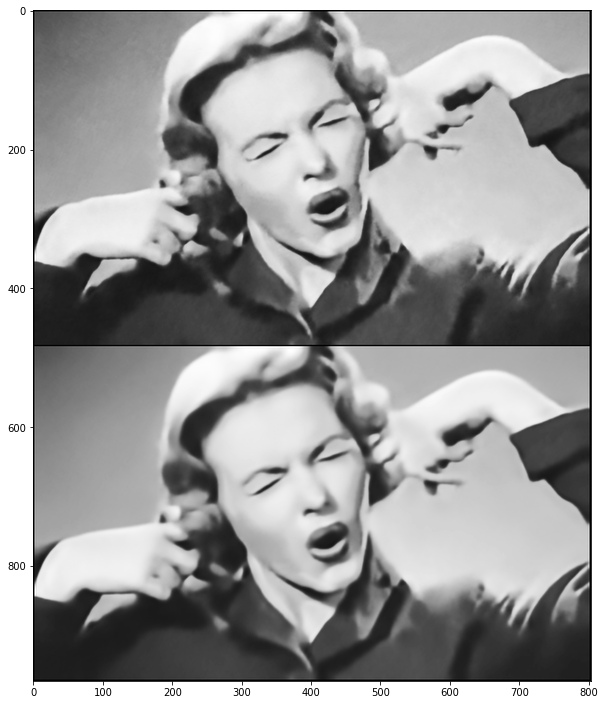



After 1700 iterations: 
Iteration 01700    Loss 0.030683   PSNR_noisy: 15.131074   PSRN_gt: 26.461564   PSNR_gt_sm: 27.318867 


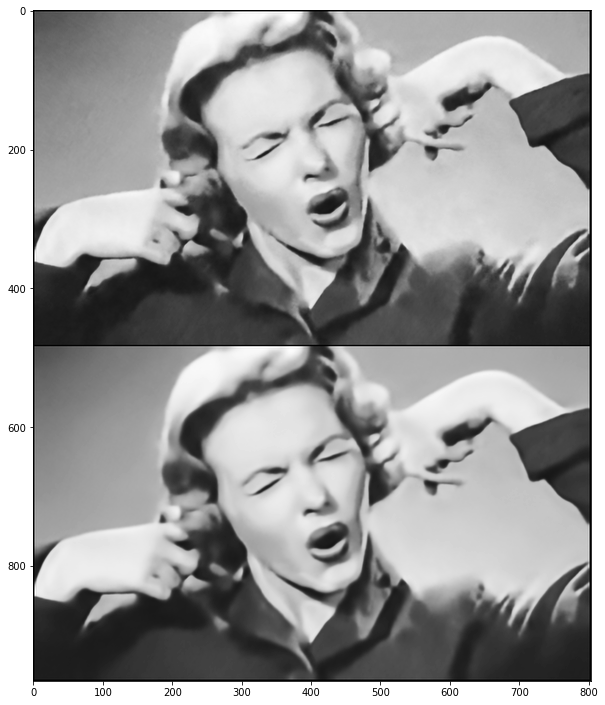



After 1800 iterations: 
Iteration 01800    Loss 0.030541   PSNR_noisy: 15.151103   PSRN_gt: 26.959398   PSNR_gt_sm: 27.562187 


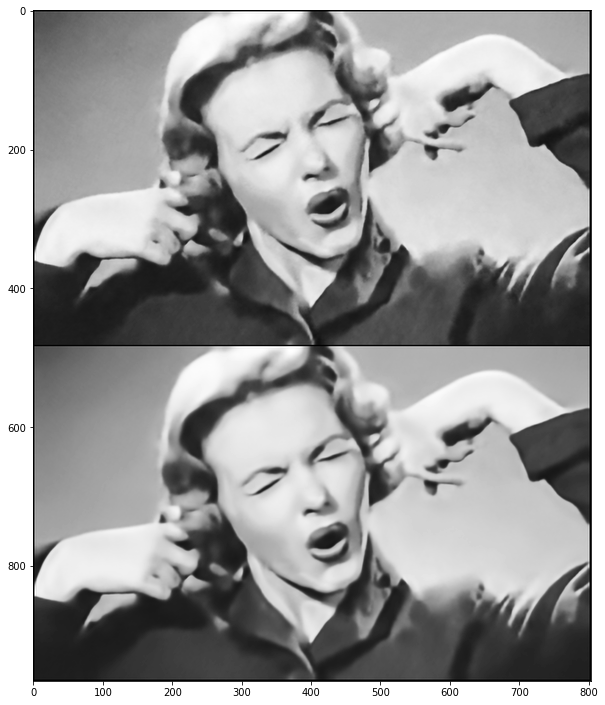



After 1900 iterations: 
Iteration 01900    Loss 0.030414   PSNR_noisy: 15.169223   PSRN_gt: 27.122690   PSNR_gt_sm: 27.760996 


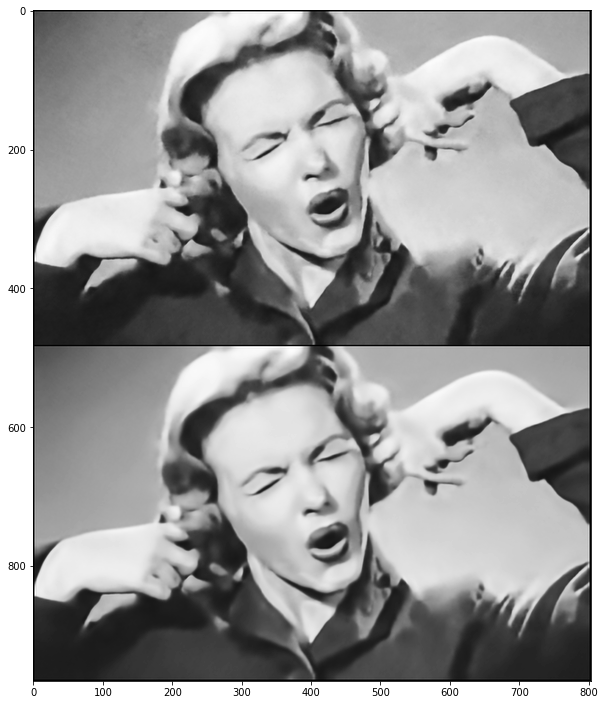



After 2000 iterations: 
Iteration 02000    Loss 0.030236   PSNR_noisy: 15.194688   PSRN_gt: 27.195184   PSNR_gt_sm: 27.904449 


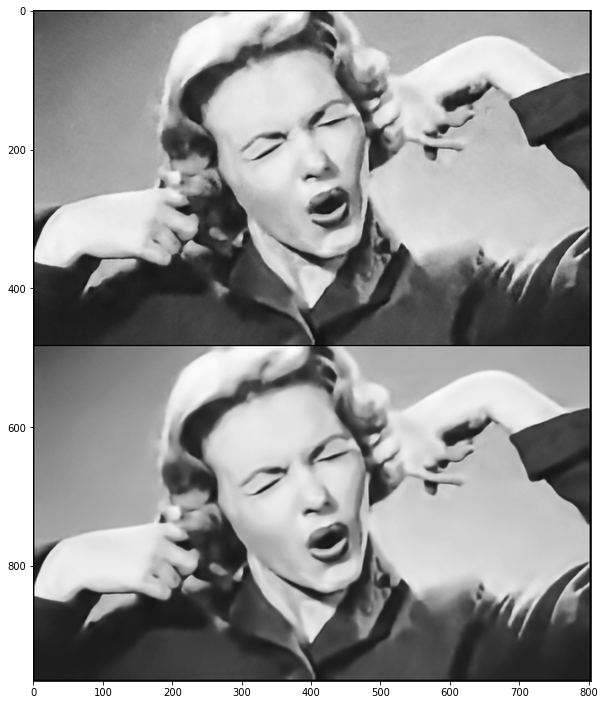



After 2100 iterations: 
Iteration 02100    Loss 0.030203   PSNR_noisy: 15.199516   PSRN_gt: 27.124316   PSNR_gt_sm: 28.013356 


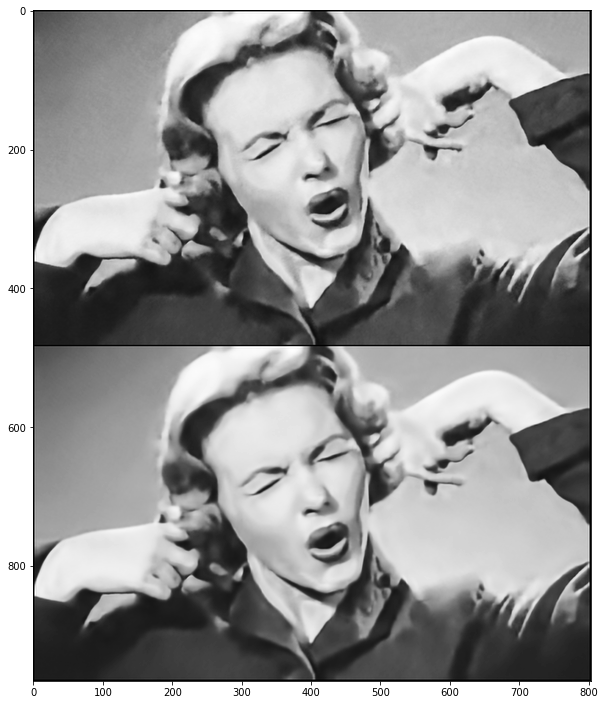



After 2200 iterations: 
Iteration 02200    Loss 0.030121   PSNR_noisy: 15.211369   PSRN_gt: 26.893886   PSNR_gt_sm: 28.074827 


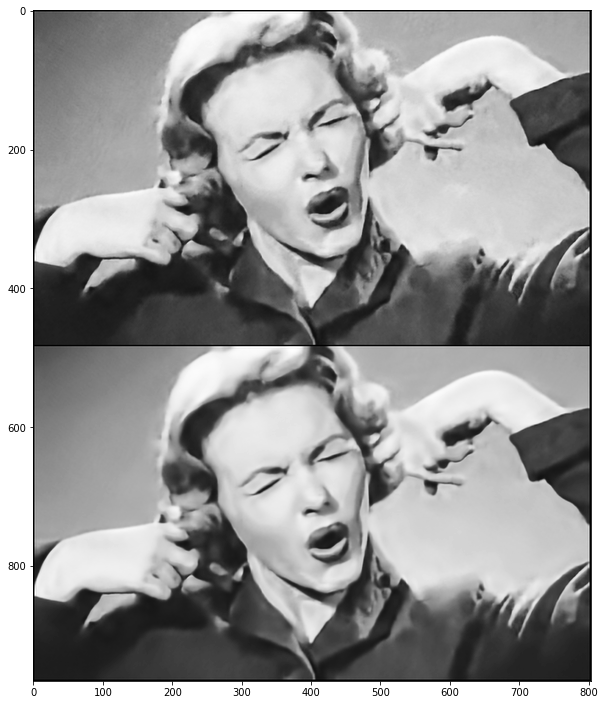



After 2300 iterations: 
Iteration 02300    Loss 0.029964   PSNR_noisy: 15.234000   PSRN_gt: 27.058562   PSNR_gt_sm: 28.105462 


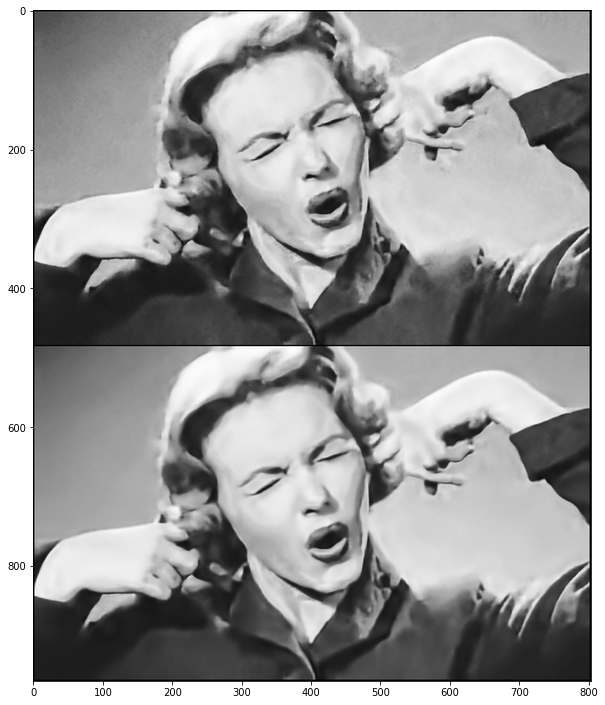



After 2400 iterations: 
Iteration 02400    Loss 0.029870   PSNR_noisy: 15.247715   PSRN_gt: 27.076518   PSNR_gt_sm: 28.112018 


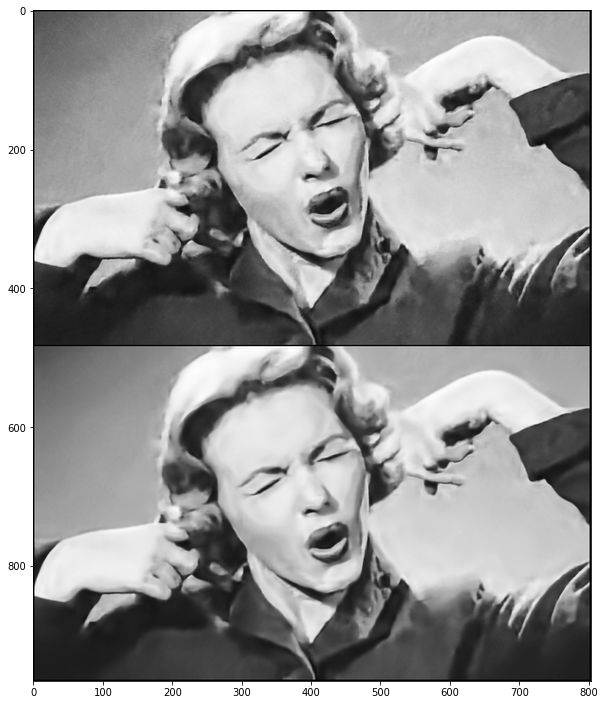

In [11]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
out_avg = None
last_net = None
psrn_noisy_last = 0
loss = []

i = 0
def closure():
    
    global i, out_avg, psrn_noisy_last, last_net, net_input, loss
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std) #changing the input to the netwok
    
    out = net(net_input)
    
    # Smoothing
    if out_avg is None:
        out_avg = out.detach()
    else:
        out_avg = out_avg * exp_weight + out.detach() * (1 - exp_weight) # calculating average network output
            
    total_loss = mse(out, img_noisy_torch)
    total_loss.backward()

    loss.append(total_loss.item())
        
    
    # caculating psrn
    psrn_noisy = compare_psnr(img_noisy_np, out.detach().cpu().numpy()[0]) # comparing psnr for the output image and the actual noisy image 
    psrn_gt    = compare_psnr(img_np, out.detach().cpu().numpy()[0]) # comparing psnr for the output image and the original image 
    psrn_gt_sm = compare_psnr(img_np, out_avg.detach().cpu().numpy()[0]) # comparing psnr for the output average and the original image 
    
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        # plotting the output image along the average image calculated
        print(f'\n\nAfter {i} iterations: ')
        print ('Iteration %05d    Loss %f   PSNR_noisy: %f   PSRN_gt: %f   PSNR_gt_sm: %f' % (i, total_loss.item(), psrn_noisy, psrn_gt, psrn_gt_sm), '\r', end='\n')
        plot_image_grid([np.clip(out_np, 0, 1), 
                         np.clip(torch_to_np(out_avg), 0, 1)], factor=figsize, nrow=1)
        
        
    
    # Backtracking
    if i % show_every:
        if psrn_noisy - psrn_noisy_last < -5: 
            print('Falling back to previous checkpoint.')

            for new_param, net_param in zip(last_net, net.parameters()):
                net_param.data.copy_(new_param.cuda())

            return total_loss*0
        else:
            last_net = [x.detach().cpu() for x in net.parameters()]
            psrn_noisy_last = psrn_noisy
            
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

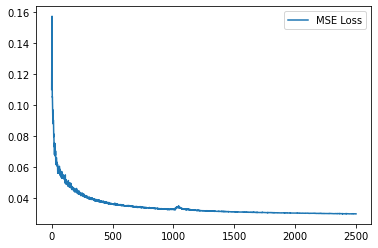

In [15]:
# Plotting the loss as a function of number of iterations
itr = [i for i in range(num_iter)]
plt.plot(itr, loss, )
plt.legend(['MSE Loss'])
plt.show()

We don't want the network to overfit the noised image and the mse loss to be so small that's we stop pretty early.

## Output

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Output Image from the network: 


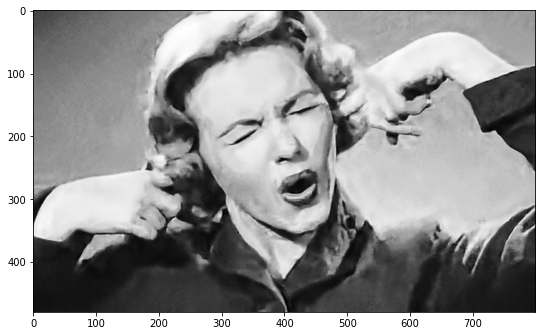


Noised Image: 


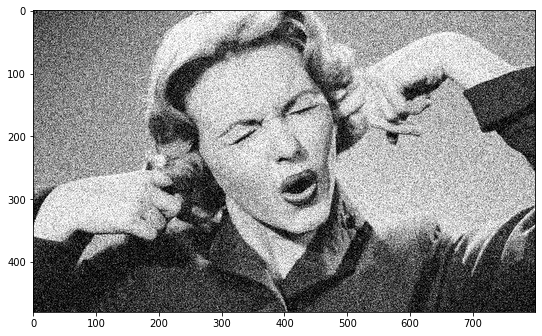


Original Image: 


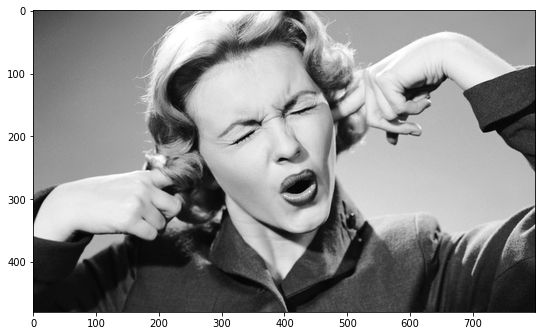

In [14]:
out_np = torch_to_np(net(net_input))

print('Output Image from the network: ')
plot_image_grid([np.clip(out_np, 0, 1)], factor=8);

print('\nNoised Image: ')
plot_image_grid([img_noisy_np], factor=8);

print('\nOriginal Image: ')
plot_image_grid([img_np], factor=8);